In [1]:
#kütüphaneler
import pandas as pd 
import numpy as np
import seaborn as sbn

In [2]:
#veriyi yükle
data = pd.read_csv("housing.csv")

In [3]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
#nan değer kontrolü
data.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [5]:
#verinin miktarı
data.shape

(20640, 10)

In [6]:
# na verinin ortalama ile dolduurlması
data["total_bedrooms"].fillna((data["total_bedrooms"].mean()),inplace=True)

In [7]:
#tekrar na kontrol
data.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [8]:
#tekrar veri büyüklüğü kontrol
data.shape

(20640, 10)

In [9]:
#label encoder yüklenmesi
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data["ocean_proximity"] = le.fit_transform(data["ocean_proximity"])


In [10]:
#encoderdan sonra ilk 5 satır kontrol
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3


<AxesSubplot:>

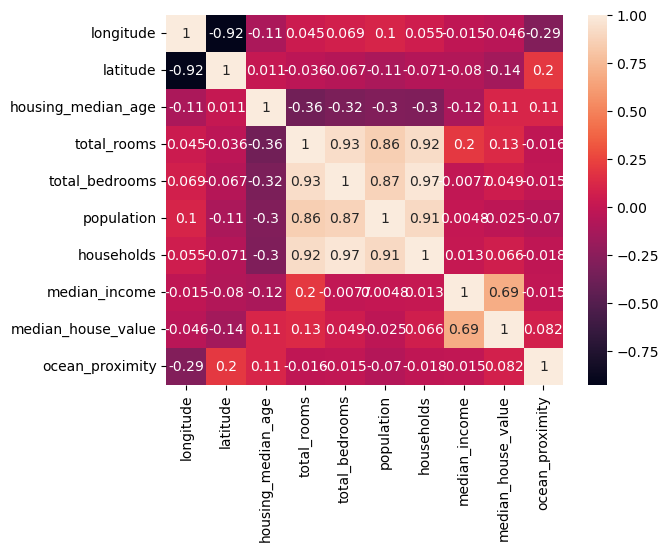

In [11]:
#heat map
cor = data.corr()
sbn.heatmap(cor,annot = True)

In [13]:
#verileri x y diye ayır ve kontrol et
x = data.drop(["median_house_value"],axis = 1)
y= data.iloc[:,-2]

y.head()

0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: median_house_value, dtype: float64

In [14]:
#veriyi describe et
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  int32  
dtypes: float64(9), int32(1)
memory usage: 1.5 MB


In [15]:
#train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3)

In [16]:
#train shape test
y_train.shape

(14448,)

In [17]:
# test shape test
x_test.shape

(6192, 9)

In [18]:
#fit ve Transform et
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.fit_transform(x_test)
x_train

array([[ 0.73519683, -0.76103437,  0.58520709, ..., -0.42983952,
        -0.43210136, -0.82211678],
       [-1.0410547 ,  1.63956111, -1.40171576, ...,  0.91165438,
        -0.62249756, -0.12019365],
       [-0.86143375,  1.1762883 , -0.13008514, ..., -0.96537662,
         0.00589434, -0.12019365],
       ...,
       [ 0.57553377, -0.8078296 ,  0.82363783, ..., -0.38742074,
         1.94795672, -0.82211678],
       [-1.62482275,  1.316674  , -0.44799279, ..., -0.67374751,
         0.43027524, -0.82211678],
       [-0.06311846,  0.35269219, -0.28903897, ..., -0.5836076 ,
        -0.28624351, -0.12019365]])

In [19]:
#modeli eğit linear regrasyon ile
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [20]:
#tahmin al r2 skor u bas
prediction=lr.predict(x_test)
print(r2_score(prediction,y_test))

0.44133544254372714


In [21]:
#random forest ile eğit 
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)

RandomForestRegressor()

In [22]:
# random forest ile tahmin al ve doğruluğunu bas
prediction_rfr=rfr.predict(x_test)
print(r2_score(prediction_rfr,y_test))

0.7262437233368566
